# Parte 1

## Ejercicio 1
1) Realice un diagrama del algoritmo de resolución de los sistemas de ecuaciones: 
-   Homogéneos  
-   No Homogéneos aplicando Laplace. 
-   No Homogéneos aplicando variación de parámetros.
![diagrama]()

# Parte 2 

## Ejercicio 1 
a. Cada ejercicio deberá estar resuelto aplicando el código correspondiente en Python. 
b. Realizar la grafica de los campos vectoriales asociados y de las funciones solución. 
c. Analizar la estabilidad. 


6b) Resuelva el siguiente problema de valores iniciales


In [13]:
import sympy as sp
# Definimos las variables y funciones simbólicamente
print("Declaramos las variables y funciones simbólicamente")
t = sp.symbols('t')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
X = sp.Matrix([x1(t), x2(t)])

# Definimos la matriz A y el vector de condición inicial
A = sp.Matrix([[2, 4], [-1, 6]])
X0 = sp.Matrix([-1, 6])

# Definimos el sistema de ecuaciones diferenciales y la condición inicial
sistema_eq = sp.Eq(X.diff(t), A * X)
condicion_incial = sp.Eq(X.subs(t, 0), X0)

display(sistema_eq)
display(condicion_incial)

print("Buscamos los autovalores de la matriz A")
# Definimos el símbolo lambda
lambda_ = sp.symbols('lambda')
# Definimos la matriz identidad del mismo tamaño que A
I = sp.eye(2)
# Calculamos A - lambda * I
A_lambda_I = A - lambda_ * I
display(sp.Symbol('det(A - λI) = 0'))
display(sp.Eq(A_lambda_I, sp.MatrixSymbol('0', 2, 2)))
# Calculamos el determinante de (A - lambda * I) y lo igualamos a 0
det_eq = sp.Eq(A_lambda_I.det(), 0)
# Mostramos el cálculo de det(A - lambda * I) = 0
display(det_eq)
eigenvalues = A.eigenvals()
print("Autovalores de A:")
for val, mult in eigenvalues.items():
    print(f"Autovalor: {val}, Multiplicidad: {mult}")

print("\n")
eigenvectors = A.eigenvects()
print("Buscamos los vectores propios de la matriz A asociados al autovalor λ = 4")
display(sp.Symbol('(A - 4I)K = 0'))
# Definimos el vector de variables (autovector)
k1, k2 = sp.symbols('k1 k2')
k = sp.Matrix([k1, k2])
# Calculamos (A - 4I) * K = 0
autovector_eq_k = sp.Eq((A - 4 * I) * k, sp.Matrix([0, 0]))
display(autovector_eq_k)  # Mostramos el sistema de ecuaciones
# Filtramos para obtener el autovector asociado al autovalor λ = 4
for val, mult, vect in eigenvectors:
    if val == 4:
        K = vect[0]
        print("Autovector asociado al autovalor 4:")
        display(K)

# Calcular el vector generalizado P
print("Calculamos el vector generalizado P")
display(sp.Symbol('(A - 4I)P = K'))
p1, p2 = sp.symbols('p1 p2')
p = sp.Matrix([p1, p2])
# Resolver (A - 4I) * P = K
autovector_eq_p = sp.Eq((A - 4 * I) * p, K)
display(autovector_eq_p)

# Asumimos que p2 = 1 para obtener una solución particular
solucion_p = sp.solve(autovector_eq_p.subs(p2, 1), p1)

# Construimos el vector P con los valores obtenidos: p1 = solucion_p[p1], p2 = 1
P = sp.Matrix([solucion_p[p1], 1])
print("Autovector generalizado P:")
display(P)
print("\n")
print("Calculamos la solución general del sistema de ecuaciones diferenciales")
# Definimos los parámetros
t, c1, c2 = sp.symbols('t c1 c2')
lambda_val = 4 # Autovalor

# Autovector K y vector generalizado P
K = sp.Matrix([2, 1])
P = sp.Matrix([1, 1])

# Definimos los términos de la solución general
X1 = c1 * K * sp.exp(lambda_val * t)
X_1 = X1
X1 = sp.UnevaluatedExpr(X1)
X2 = c2 * (K * t + P) * sp.exp(lambda_val * t)
X_2 = X2
X2 = sp.UnevaluatedExpr(X2)

# Mostramos cada término de la solución de forma similar a la imagen
display(sp.MatrixSymbol('X(t) =',0,0), X1 + X2)

print("\n")
print("Calculamos la solución particular del sistema de ecuaciones diferenciales, con las condiciones iniciales X(0) = [-1, 6]")
# Evaluamos X(0) usando la condición inicial


X_0 = X_1 + X_2
X_0 = sp.Matrix(X_0).subs(t, 0)
display(sp.MatrixSymbol('X(0) =',0,0), X_0)
# Igualamos X(0) a la condición inicial y resolvemos para c1 y c2
ecuacion = [sp.Eq(X_0[i], X0[i]) for i in range(2)]
print("Resolvemos el sistema de ecuaciones, teniendo en cuenta los valores de la condicion incial")
display(ecuacion[0], ecuacion[1])

# Resolución del sistema de ecuaciones
solution = sp.solve(ecuacion, (c1, c2))
print ("Solución del sistema de ecuaciones:")
print ("C1: ", solution[c1])
print ("C2: ", solution[c2])



Declaramos las variables y funciones simbólicamente


Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[2*x1(t) + 4*x2(t)],
[ -x1(t) + 6*x2(t)]]))

Eq(Matrix([
[x1(0)],
[x2(0)]]), Matrix([
[-1],
[ 6]]))

Buscamos los autovalores de la matriz A


det(A - λI) = 0

Eq(Matrix([
[2 - lambda,          4],
[        -1, 6 - lambda]]), 0)

Eq(lambda**2 - 8*lambda + 16, 0)

Autovalores de A:
Autovalor: 4, Multiplicidad: 2


Buscamos los vectores propios de la matriz A asociados al autovalor λ = 4


(A - 4I)K = 0

Eq(Matrix([
[-2*k1 + 4*k2],
[  -k1 + 2*k2]]), Matrix([
[0],
[0]]))

Autovector asociado al autovalor 4:


Matrix([
[2],
[1]])

Calculamos el vector generalizado P


(A - 4I)P = K

Eq(Matrix([
[-2*p1 + 4*p2],
[  -p1 + 2*p2]]), Matrix([
[2],
[1]]))

Autovector generalizado P:


Matrix([
[1],
[1]])



Calculamos la solución general del sistema de ecuaciones diferenciales


X(t) =

Matrix([
[2*c1*exp(4*t)],
[  c1*exp(4*t)]]) + Matrix([
[c2*(2*t + 1)*exp(4*t)],
[  c2*(t + 1)*exp(4*t)]])



Calculamos la solución particular del sistema de ecuaciones diferenciales, con las condiciones iniciales X(0) = [-1, 6]


X(0) =

Matrix([
[2*c1 + c2],
[  c1 + c2]])

Resolvemos el sistema de ecuaciones, teniendo en cuenta los valores de la condicion incial


Eq(2*c1 + c2, -1)

Eq(c1 + c2, 6)

Solución del sistema de ecuaciones:
C1:  -7
C2:  13


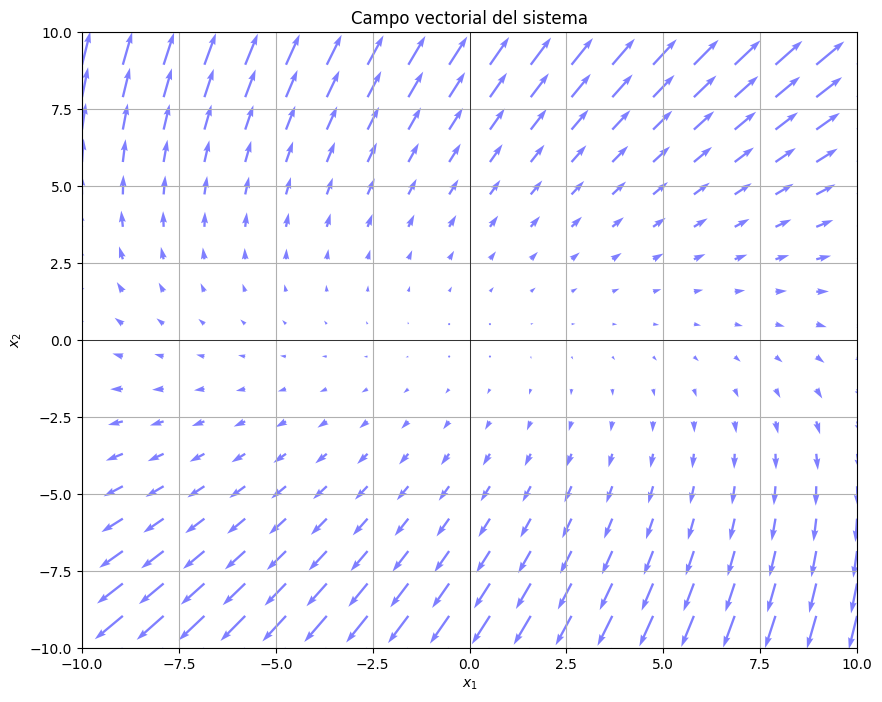

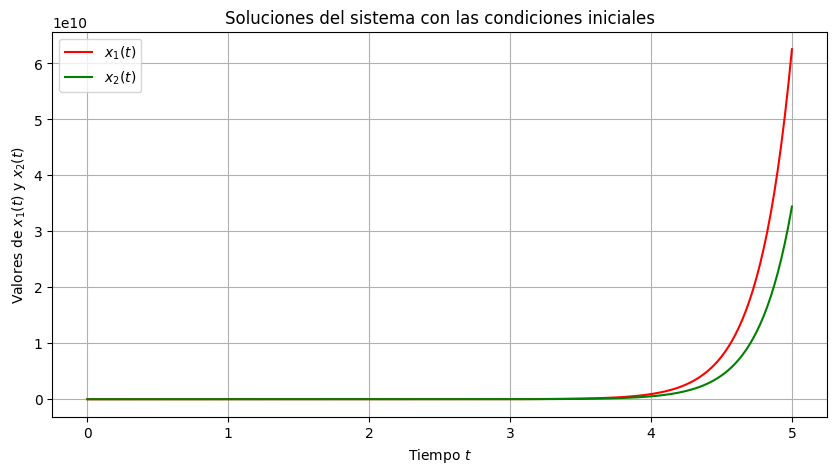

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

# Definimos la matriz del sistema
A = np.array([[2, 4], [-1, 6]])

# Configuración de la grilla para el campo vectorial
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculamos los vectores del campo en cada punto de la grilla
U = A[0, 0] * X + A[0, 1] * Y
V = A[1, 0] * X + A[1, 1] * Y

# Graficamos el campo vectorial
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, color="b", alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Campo vectorial del sistema")
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# Parte 2: Graficar las soluciones del sistema
# Definimos la función del sistema de ecuaciones diferenciales para `solve_ivp`
def sistema(t, X):
    return A @ X

# Condiciones iniciales
X0 = [-1, 6]

# Intervalo de tiempo para la solución
t_span = (0, 5)
t_eval = np.linspace(0, 5, 200)

# Resolver el sistema usando `solve_ivp`
sol = solve_ivp(sistema, t_span, X0, t_eval=t_eval)

# Graficamos las soluciones x1(t) y x2(t) en función de t
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='$x_1(t)$', color='r')
plt.plot(sol.t, sol.y[1], label='$x_2(t)$', color='g')
plt.xlabel('Tiempo $t$')
plt.ylabel('Valores de $x_1(t)$ y $x_2(t)$')
plt.title("Soluciones del sistema con las condiciones iniciales")
plt.legend()
plt.grid()
plt.show()


In [19]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[2, 4], [-1, 6]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")


Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[ 2, 4],
[-1, 6]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[  2*a - b,   2*b - c],
[4*a + 6*b, 4*b + 6*c]])

M * A:


Matrix([
[2*a - b, 4*a + 6*b],
[2*b - c, 4*b + 6*c]])

Suma A^T * M + M * A:


Matrix([
[    4*a - 2*b, 4*a + 8*b - c],
[4*a + 8*b - c,    8*b + 12*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[    4*a - 2*b, 4*a + 8*b - c],
[4*a + 8*b - c,    8*b + 12*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(4*a - 2*b, -1)

Eq(4*a + 8*b - c, 0)

Eq(4*a + 8*b - c, 0)

Eq(8*b + 12*c, -1)

Soluciones para a, b y c:


{a: -53/256, b: 11/128, c: -9/64}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[-53/256, 11/128],
[ 11/128,  -9/64]])

Autovalores de la matriz M:


-89/512 - 5*sqrt(89)/512

-89/512 + 5*sqrt(89)/512

Conclusión sobre la estabilidad:
Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.


## Ejercicio 5

Desarrolle el código necesario para evaluar la estabilidad a partir de la función de Lyapunov, 
visualizando los cálculos necesarios, del punto 2 de Estabilidad. Realice la gráfica 
correspondiente. 

Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[ 0,  1],
[-4, -5]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[   -4*b,    -4*c],
[a - 5*b, b - 5*c]])

M * A:


Matrix([
[-4*b, a - 5*b],
[-4*c, b - 5*c]])

Suma A^T * M + M * A:


Matrix([
[         -8*b, a - 5*b - 4*c],
[a - 5*b - 4*c,    2*b - 10*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[         -8*b, a - 5*b - 4*c],
[a - 5*b - 4*c,    2*b - 10*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(-8*b, -1)

Eq(a - 5*b - 4*c, 0)

Eq(a - 5*b - 4*c, 0)

Eq(2*b - 10*c, -1)

Soluciones para a, b y c:


{a: 9/8, b: 1/8, c: 1/8}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[9/8, 1/8],
[1/8, 1/8]])

Autovalores de la matriz M:


5/8 - sqrt(17)/8

sqrt(17)/8 + 5/8

Conclusión sobre la estabilidad:
Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.


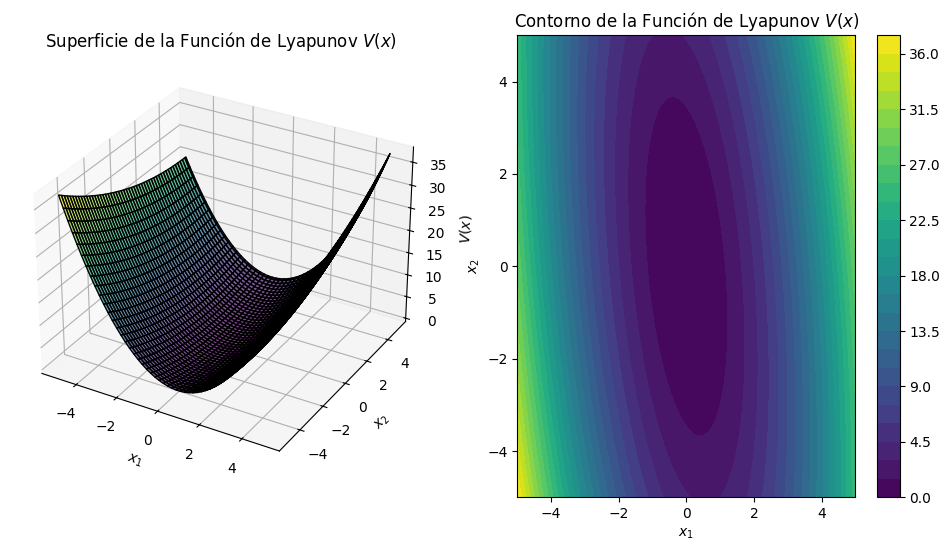

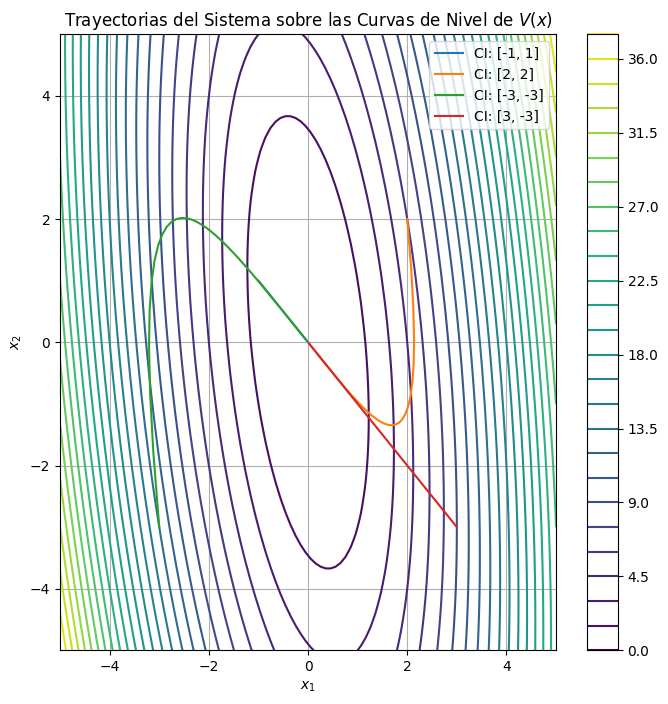

In [18]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[0, 1], [-4, -5]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")

# ---- Gráfica de la función de Lyapunov y las trayectorias ----

# función de Lyapunov V(x) = x^T M x en términos de x1 y x2
def V(x1, x2):
    M_np = np.array(M_solution).astype(np.float64)  # Convertir M a una matriz NumPy
    return np.einsum('ij,ij->i', np.einsum('ij,jk->ik', np.array([x1, x2]).T, M_np), np.array([x1, x2]).T)

# Crear un espacio de puntos para graficar
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
V_vals = V(X1.ravel(), X2.ravel()).reshape(X1.shape)

# Grafica de la superficie y el contorno de la función de Lyapunov
fig = plt.figure(figsize=(12, 6))

# Superficie 3D de V(x)
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax3d.plot_surface(X1, X2, V_vals, cmap='viridis', edgecolor='k', alpha=0.7)
ax3d.set_title('Superficie de la Función de Lyapunov $V(x)$')
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')
ax3d.set_zlabel('$V(x)$')

# Contorno de V(x) en 2D
ax2d = fig.add_subplot(1, 2, 2)
contour = ax2d.contourf(X1, X2, V_vals, levels=30, cmap='viridis')
plt.colorbar(contour)
ax2d.set_title('Contorno de la Función de Lyapunov $V(x)$')
ax2d.set_xlabel('$x_1$')
ax2d.set_ylabel('$x_2$')
plt.show()

# ---- Grafica de las trayectorias del sistema sobre el contorno de V(x) ----
def sistema(t, X):
    return A @ X

plt.figure(figsize=(8, 8))
contour = plt.contour(X1, X2, V_vals, levels=30, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Trayectorias del Sistema sobre las Curvas de Nivel de $V(x)$')

# Grafica de trayectorias con diferentes condiciones iniciales
condiciones_iniciales = [[-1, 1], [2, 2], [-3, -3], [3, -3]]
t_span = (0, 5)
t_eval = np.linspace(0, 5, 100)

for X0 in condiciones_iniciales:
    sol = solve_ivp(sistema, t_span, X0, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'CI: {X0}')

plt.legend()
plt.grid()
plt.show()


In [5]:
import sympy as sp

# Definir las variables simbólicas
s, t = sp.symbols('s t')
X, Y = sp.symbols('X Y', cls=sp.Function)
e_s = sp.exp(-s)
e_2s = sp.exp(-2 * s)

# Expresiones para X(s) y Y(s) simplificadas que obtuvimos antes
X_s_simplified = (s**2 * sp.exp(s) + s * sp.exp(2*s) - 7 * s * sp.exp(s) - 6 * s - 6 * sp.exp(2*s) + 6 * sp.exp(s) + 6) * sp.exp(-2*s) / (s * (s**2 - 8*s + 7))
Y_s_simplified = (-s**2 + s * sp.exp(s) + 2 * s + sp.exp(2*s) - sp.exp(s) - 1) * sp.exp(-2*s) / (s * (s**2 - 8*s + 7))

# Calcular la Transformada Inversa de Laplace para X(s) y Y(s)
x_t = sp.inverse_laplace_transform(X_s_simplified, s, t)
y_t = sp.inverse_laplace_transform(Y_s_simplified, s, t)

# Mostrar los resultados
print("La función x(t) es:")
display(x_t)

print("\nLa función y(t) es:")
display(y_t)

x_1 = x_t.subs(t, 1)
y_2 = y_t.subs(t, 2)

print("x(1) =", x_1)
print("y(2) =", y_2)


La función x(t) es:


exp(7*t)*Heaviside(t)/42 + 5*exp(t)*Heaviside(t)/6 - 6*exp(7*t - 14)*Heaviside(t - 2)/7 + exp(7*t - 7)*Heaviside(t - 1)/7 - 6*Heaviside(t)/7 + 6*Heaviside(t - 2)/7 + 6*Heaviside(t - 1)/7


La función y(t) es:


exp(7*t)*Heaviside(t)/42 - exp(t)*Heaviside(t)/6 - 6*exp(7*t - 14)*Heaviside(t - 2)/7 + exp(7*t - 7)*Heaviside(t - 1)/7 + Heaviside(t)/7 - Heaviside(t - 2)/7 - Heaviside(t - 1)/7

x(1) = -5/14 + 5*E/6 + exp(7)/42
y(2) = -exp(2)/6 - 1/2 + exp(7)/7 + exp(14)/42


In [ ]:
import sympy as sp

# Definir las variables simbólicas
t = sp.symbols('t')
theta = sp.Heaviside
# Definir las expresiones de x(t) y y(t) (sustituye aquí las funciones obtenidas)
x_t = (sp.exp(t)*theta(t)/42) + (5*sp.exp(t)*theta(t)/6) - (6*sp.exp(t)*theta(t-2)/7) + (sp.exp(t)*theta(t-1)/7) - (60*theta(t)/7) + (60*theta(t-2)/7) + (60*theta(t-1)/7)
display(x_t)
y_t = (sp.exp(t)*theta(t)/42) + (sp.exp(t)*theta(t)/6) - (6*sp.exp(t)*theta(t-2)/7) + (sp.exp(t)*theta(t-1)/7) + (theta(t)/7) - (theta(t-2)/7) - (theta(t-1)/7)
display(y_t)

# Evaluar x(1) y y(2)
x_1 = x_t.subs(t, 1)
y_2 = y_t.subs(t, 2)

print("x(1) =", x_1)
print("y(2) =", y_2)


6*exp(t)*Heaviside(t)/7 - 6*exp(t)*Heaviside(t - 2)/7 + exp(t)*Heaviside(t - 1)/7 - 60*Heaviside(t)/7 + 60*Heaviside(t - 2)/7 + 60*Heaviside(t - 1)/7

4*exp(t)*Heaviside(t)/21 - 6*exp(t)*Heaviside(t - 2)/7 + exp(t)*Heaviside(t - 1)/7 + Heaviside(t)/7 - Heaviside(t - 2)/7 - Heaviside(t - 1)/7

x(1) = -30/7 + 13*E/14
y(2) = -2*exp(2)/21 - 1/14
